In [5]:
import numpy as np
d = np.genfromtxt("PCA_vector.csv",delimiter=',',dtype=float)

In [13]:
d[:,:20]

array([[-0.09691582,  0.22391558,  0.01041735, ...,  0.23462901,
        -0.42642686,  0.41572623],
       [-0.1118418 ,  0.17207501, -0.23213089, ..., -0.02877864,
         0.03820193,  0.24632573],
       [-0.02285456,  0.21226558, -0.03751076, ...,  0.02641158,
        -0.16837354, -0.11401435],
       ...,
       [ 0.18835974,  0.09942112,  0.07509949, ..., -0.07662916,
         0.13268355, -0.06799134],
       [-0.14339667,  0.2522833 ,  0.29850088, ...,  0.21624902,
         0.00129946, -0.00887061],
       [ 0.20664948,  0.00829546,  0.10699617, ..., -0.14609803,
         0.01671868,  0.0346874 ]])

In [10]:
from pymatgen import Composition, Element
#load main group element
with open("elements_list_main.txt", "r") as text_file:
    a=text_file.read()
elements_list_main=a.split()

In [15]:
raw_number_list=[25, 1,15,22,37,43, 76, 2, 13, 30, 14, 20, 21, 39, 41, 49, 26, 7, 28, 23, 53, 16, 3, 44, 27, 29, 0, 8, 24, 34, 4, 31, 55, 48]

F=d[raw_number_list,:20]

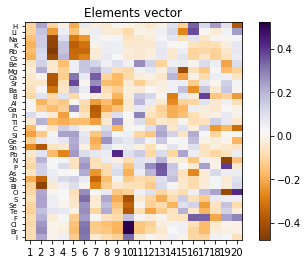

In [16]:



import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# sphinx_gallery_thumbnail_number = 2

vegetables = elements_list_main
farmers = list(range(1,21))

harvest = F[:,:20]


fig, ax = plt.subplots()
im = ax.imshow(harvest,aspect=20/34,cmap="PuOr")
#figure(num=None, figsize=(10, 20), dpi=1000, facecolor='w', edgecolor='k')
# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables,fontsize=7)
fig.colorbar(im)
# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         #rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
    #for j in range(len(farmers)):
        #text = ax.text(j, i, harvest[i, j],
                       #ha="center", va="center", color="w")

ax.set_title("Elements vector")
#fig.tight_layout()
plt.show()
fig.savefig("test.pdf",format="pdf",dpi=1000)

In [17]:
ax_combo_colormap=ax
figure_combo_colormap=fig

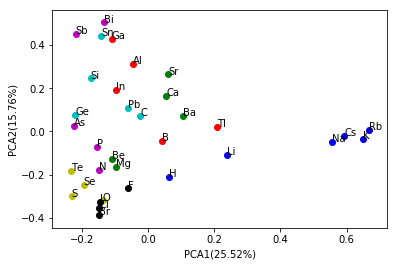

In [18]:
from sklearn.decomposition import PCA
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
pca=PCA(n_components=None, copy=True, whiten=False)

pcaTransformed_lat = pca.fit_transform(F)
first2pca = pcaTransformed_lat[:,:2]
data_main = first2pca[:,:]
data_main.shape
#data_main_flip=np.flip(data_main,axis=1)

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
'''
elements_list_main[0:6]
elements_list_main[6:11]
elements_list_main[11:16]
elements_list_main[16:21]
elements_list_main[21:26]
elements_list_main[26:30]
elements_list_main[30:]
'''
fig,ax= plt.subplots()
ax.scatter(data_main[:6,0],data_main[:6,1],color='b')
ax.scatter(data_main[6:11,0],data_main[6:11,1],color='g')
ax.scatter(data_main[11:16,0],data_main[11:16,1],color='r')
ax.scatter(data_main[16:21,0],data_main[16:21,1],color='c')
ax.scatter(data_main[21:26,0],data_main[21:26,1],color='m')
ax.scatter(data_main[26:30,0],data_main[26:30,1],color='y')
ax.scatter(data_main[30:,0],data_main[30:,1],color='k')
#plt.xlim(-0.4,0.75)
#plt.ylim(-0.5,0.75)
for i in range(len(elements_list_main)):
    txt = elements_list_main[i]
    ax.annotate(txt, (data_main[i,0], data_main[i,1]))
plt.xlabel("PCA1(25.52%)")
plt.ylabel("PCA2(15.76%)")
fig.savefig("scatter_encoder+svd.pdf",format="pdf",dpi=1000)